r_max = 1.0000e-05 m , t_max = 3.0000e-06 s


/home/pratibhajangra/miniconda3/envs/PhD/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


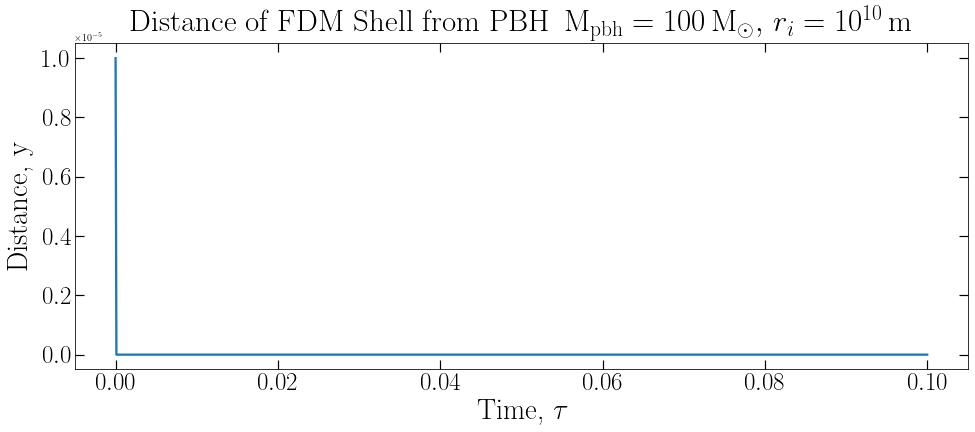

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})




π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
t_i = 2.358e5                # in units of seconds
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16          # in units of kg m^-3
M_solar = 1.989e30        # in units of kg
c = 3e8                 #in units of m/s
A = 1.495e11                 # Astronomical unit
pc = 3.085e16               # in unist of meter. 
yr = 3.154e7              # in units of seconds
a_eq = 2.9374e-4

h_bar = 1.0545718e-34        # reduced Planck constant in unkits of J.s
h_bar_c = h_bar * c

eV = 1.60218e-19               #in units of J
eV_to_kg = 1.7826e-36             #in units of kg
m_FDM_eV = 1e-22     #in units of eV/c²
m_FDM = m_FDM_eV * eV_to_kg      # Mass of FDM boson in units of kg
gamma = 2.0  # Power-law density parameter


h = 0.67
ρ_c0 = 2.80659e-7 * (h**2)    #in units of M☉ pc^-3 with ρ_c0= 1.9e-26 * (h**2)kgm^-3  
Ω_r0 = 9.4e-5
Ω_m0 = 0.32
ρ_r0 = Ω_r0 * ρ_c0
ρ_m0 = Ω_m0 * ρ_c0
H_0 = np.sqrt((8 * π * G * ρ_c0)/3)

η_acc = 0.1  #Accretion efficiency
 


def ρ_background(z): #Density of the Universe in units of kgm⁻³
    ρ_r = ρ_r0 * ((1 + z)**4)
    ρ_m = ρ_m0 * ((1 + z)**3)
    return ρ_r  + ρ_m

def M_background(r):
    return 0 #ρ_background(z) * (4/3) * np.pi * (r**3)


def j(n, t):
    #M_pbh = 100 * M_solar  # PBH mass in kg
    r = n[0]
    v = n[1]
    d2r_dt2 = -(1/(r**2)) + gamma * (2  - gamma)/(4 *  (r**3)) # -(r/(4*(t**2)))
    return [v, d2r_dt2]


#M_pbh = 100 * M_solar  # PBH mass in kg
#M_shell =  0 #100 * m_FDM  #mass of FDM shell enclosed within a radius r, in kg 




fig,ax = plt.subplots(1, figsize = (16, 6))
plt.rc('lines', linewidth = 2.3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



m = 1 
gamma = 1e-10
L_Q = h_bar**2 / (G * m**2)       
t_Q = np.sqrt(LQ**3 / (G * m))     


delta_i = 1e-5
r_i = 1e-5        
t_i = 3e-6                     
v_i = (2 * r_i)/ (3 * t_i)              
               



ps = np.linspace(t_i, 0.1, 1000)  
z0 = [r_i, v_i]  #Initial conditions with H(t)=1/(2t) in RD
ns = odeint(j, z0, ps)
zs = ns[:, 0]
z_max = np.max(zs)
p_max = ps[np.argmax(zs)]
print("r_max =", '%.4e' % z_max, "m", ",", "t_max =", '%.4e' % p_max, "s")


plt.plot(ps, zs, 'C0')



plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)
plt.title(r'Distance of FDM Shell from PBH $\,\mathrm{M_{pbh}} =  100\, \mathrm{M_{\odot}},\,r_i = 10^{10}\, \mathrm{m} $', fontsize = 31, pad = 11)
plt.show()

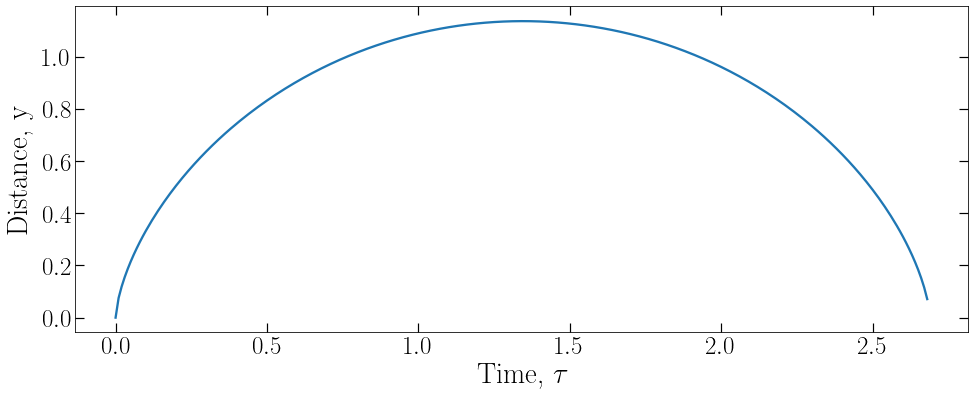

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


fig,ax = plt.subplots(1, figsize = (16, 6))
plt.rc('lines', linewidth = 2.3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

 
def j(t, y):
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2)
    return [dydtau, dydtau2]



gamma = 1e-10
delta_i = 1e-5

tau_i = 1e-8 
y_i =  ((9/2) * (1/(1 + delta_i)) * (tau_i**2))**(1/3)
v_i = (3 * (1/(1 + delta_i)) * (tau_i))/(y_i**2)


tau_f = 100

y0 = [y_i, v_i]
tau_arr = np.linspace(tau_i, tau_f, 10000)
sol = solve_ivp(j, [tau_i, tau_f], y0, t_eval = tau_arr, method ='RK45', rtol=1e-8, atol=1e-10)



plt.plot(sol.t, sol.y[0])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)
plt.show()